In [2]:
!pip install kaggle


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Dipanshu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

The syntax of the command is incorrect.
cp: cannot create regular file '~/.kaggle/': No such file or directory


In [16]:
import zipfile
zip_ref = zipfile.ZipFile('E:\NLP\test_set.zip','r')
zip_ref.extractall()    
zip_ref.close()


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: malformed \N character escape (3793720528.py, line 2)

In [ ]:
import os
print(os.path.exists('/content/test_set.zip'))  # Should return True


False


In [15]:
import zipfile
zip_path = r'E:\NLP\test_set.zip'
with zipfile.ZipFile(test_set.zip, 'r') as zip_ref:
    zip_ref.extractall()

NameError: name 'test_set' is not defined

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential 
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [11]:


train_ds = keras.utils.image_dataset_from_directory(
    directory=r'E:\NLP\test_set',
    labels='inferred',
    label_mode='int', # so through this cat get assign 0 and dog get assign 1.
    batch_size=32,
    image_size=(256, 256) # every image have different size so through this
    # we get reshape size to similar
)

Validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test_set',
    labels='inferred',
    label_mode='int', # so through this cat get assign 0 and dog get assign 1.
    batch_size=32,
    image_size=(256,256) # every image have different size so  through this
    # we get reshape  size to similar
)

Found 2023 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [12]:
#normalize 
 # its is used because we want to all the pixel value from 0 to 1.
# otherwise result is not good
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = Validation_ds.map(process)

In [13]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

C:\Users\Dipanshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [17]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 60s 894ms/step - accuracy: 0.5111 - loss: 0.7677 - val_accuracy: 0.5007 - val_loss: 0.7432
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 53s 820ms/step - accuracy: 0.5286 - loss: 0.7054 - val_accuracy: 0.5932 - val_loss: 0.6653
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 53s 831ms/step - accuracy: 0.6076 - loss: 0.6658 - val_accuracy: 0.7479 - val_loss: 0.5562
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 53s 830ms/step - accuracy: 0.6732 - loss: 0.5941 - val_accuracy: 0.7929 - val_loss: 0.4254
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 59s 927ms/step - accuracy: 0.7589 - loss: 0.4933 - val_accuracy: 0.7973 - val_loss: 0.4142
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 53s 820ms/step - accuracy: 0.8437 - loss: 0.3634 - val_accuracy: 0.9288 - val_loss: 0.1634
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 52s 817ms/step - accuracy: 0.9047 - loss: 0.1986 - val_accuracy: 0.9614 - val_loss: 0.1104
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 55s 859ms/step - accuracy: 0.9607 - loss: 0.1083 - val_accu

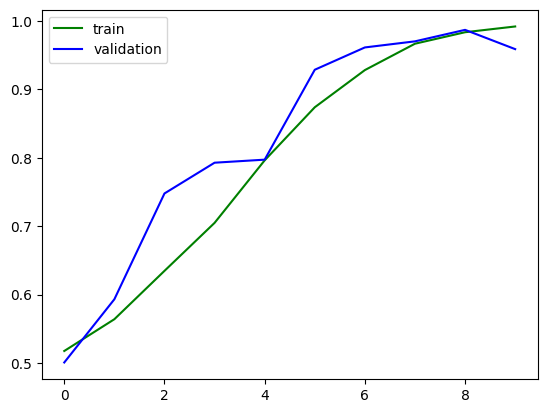

In [19]:
# plot  graph for to find accuracy of model
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color="green",label="train")
plt.plot(history.history['val_accuracy'],color="blue",label="validation")
plt.legend()
plt.show()

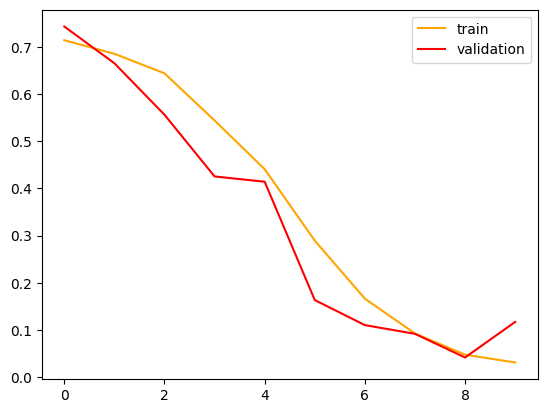

In [21]:
plt.plot(history.history['loss'],color="orange",label="train")
plt.plot(history.history['val_loss'],color="red",label="validation")
plt.legend()
plt.show()

In [22]:
import cv2
test_img= cv2.imread("cat.4172.jpg")
# plt.imshow(test_img)
test_img

array([[[191, 187, 182],
        [184, 180, 175],
        [180, 175, 174],
        ...,
        [131, 149, 166],
        [133, 149, 166],
        [133, 149, 166]],

       [[188, 183, 180],
        [181, 176, 173],
        [177, 172, 171],
        ...,
        [140, 158, 175],
        [142, 158, 175],
        [142, 158, 175]],

       [[191, 187, 186],
        [184, 180, 179],
        [181, 177, 176],
        ...,
        [139, 157, 174],
        [141, 157, 174],
        [141, 157, 174]],

       ...,

       [[177, 179, 180],
        [ 93,  98,  99],
        [ 91, 103, 105],
        ...,
        [ 87, 103, 120],
        [ 85, 101, 118],
        [ 85, 101, 118]],

       [[178, 182, 183],
        [ 93, 101, 101],
        [ 91, 104, 106],
        ...,
        [ 90, 106, 123],
        [ 90, 106, 123],
        [ 90, 106, 123]],

       [[178, 182, 183],
        [ 93, 101, 101],
        [ 91, 104, 106],
        ...,
        [ 90, 106, 123],
        [ 90, 106, 123],
        [ 90, 106, 123]]

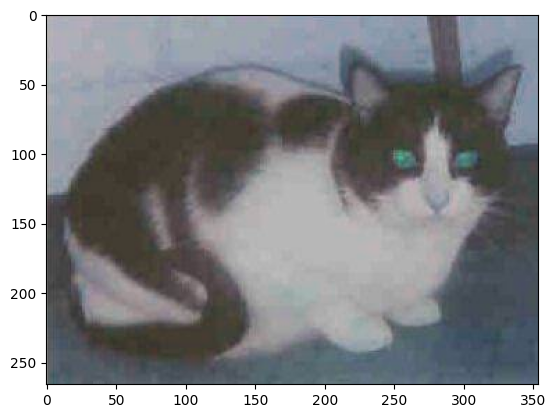

In [23]:
plt.imshow(test_img)

In [28]:
test_input=test_img.shape

In [31]:
import numpy as np

In [36]:
test_img = cv2.resize(test_img,(256,256))

In [37]:
test_input = test_img.reshape((1,256,256,3))

In [38]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


array([[0.]], dtype=float32)

In [39]:
test_img2=cv2.imread("dog.4035.jpg")
test_img2

array([[[255, 249, 249],
        [255, 250, 250],
        [255, 251, 250],
        ...,
        [133, 132, 134],
        [131, 130, 132],
        [129, 128, 130]],

       [[236, 228, 228],
        [241, 233, 233],
        [245, 240, 239],
        ...,
        [133, 132, 134],
        [131, 130, 132],
        [130, 129, 131]],

       [[212, 204, 204],
        [220, 212, 212],
        [231, 223, 223],
        ...,
        [132, 131, 133],
        [131, 130, 132],
        [130, 129, 131]],

       ...,

       [[167, 174, 189],
        [166, 173, 188],
        [167, 174, 189],
        ...,
        [ 77,  99,  87],
        [ 57,  79,  67],
        [ 49,  68,  59]],

       [[167, 174, 189],
        [165, 172, 187],
        [164, 171, 186],
        ...,
        [ 59,  82,  68],
        [ 46,  69,  55],
        [ 45,  67,  55]],

       [[161, 168, 183],
        [159, 166, 181],
        [158, 165, 180],
        ...,
        [ 47,  70,  56],
        [ 32,  55,  41],
        [ 47,  69,  57]]

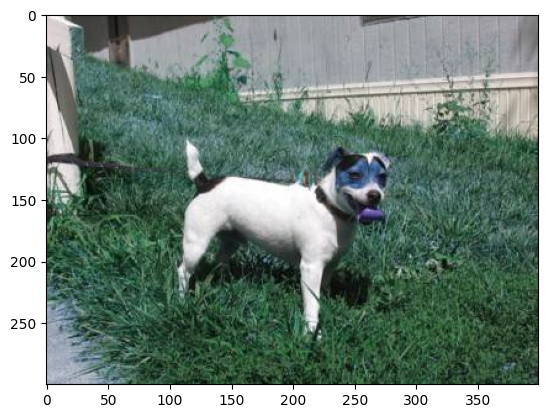

In [41]:
plt.imshow(test_img2)

In [ ]:
test_img2=cv2.resize(test_img2,(256,256))

In [51]:
test_input2=test_img2.reshape((1,256,256,3))

In [52]:
model.predict(test_input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[1.]], dtype=float32)

 if our model is not train well so we use some method to reduce outlier

1.Add more data
2.Data Augmentation
3.L1/L2 Regulaizer
4.Dropout
5.Batch Norm
6.Reduce complexity

In [ ]:
# if our model is not train well so we use BatchNormalization and dropout method to reduce outlier
from keras.layers import BatchNormalization,Dropout


In [8]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))

C:\Users\Dipanshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [12]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.5731 - loss: 4.6475 - val_accuracy: 0.4998 - val_loss: 16.0296
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.5472 - loss: 2.6371 - val_accuracy: 0.5032 - val_loss: 5.9074
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.5682 - loss: 1.5761 - val_accuracy: 0.5106 - val_loss: 1.4485
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.5852 - loss: 1.4006 - val_accuracy: 0.5096 - val_loss: 1.8597
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.6020 - loss: 1.0687 - val_accuracy: 0.5166 - val_loss: 1.2569
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.6505 - loss: 0.7315 - val_accuracy: 0.6495 - val_loss: 0.6820
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.6792 - loss: 0.6654 - val_accuracy: 0.6367 - val_loss: 1.0722
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - accuracy: 0.7126 - loss: 0.6040 - val_accuracy: 0.7177 - 

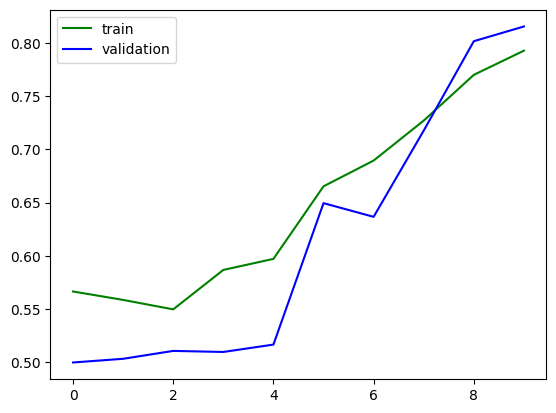

In [13]:
# plot  graph for to find accuracy of model
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color="green",label="train")
plt.plot(history.history['val_accuracy'],color="blue",label="validation")
plt.legend()
plt.show()

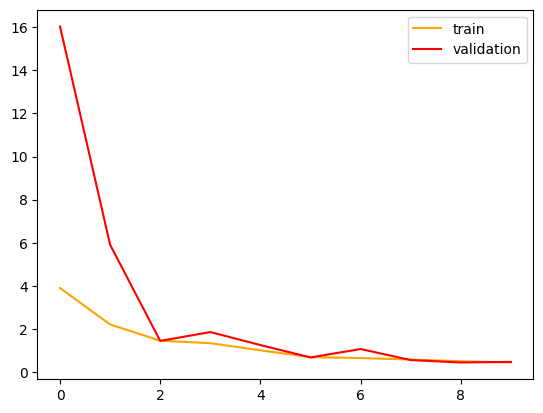

In [14]:
plt.plot(history.history['loss'],color="orange",label="train")
plt.plot(history.history['val_loss'],color="red",label="validation")
plt.legend()
plt.show()